
# Домашнее задание 1.

 ## 1. Импортируем библиоте##

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

откроем файл с данными и посмотрим на него


In [45]:
df = pd.read_csv("cars_moldova.csv")

In [46]:
df.info

<bound method DataFrame.info of              Make         Model  Year      Style  Distance  \
0          Toyota         Prius  2011  Hatchback  195000.0   
1         Renault  Grand Scenic  2014  Universal  135000.0   
2      Volkswagen          Golf  1998  Hatchback       1.0   
3         Renault        Laguna  2012  Universal  110000.0   
4            Opel         Astra  2006  Universal  200000.0   
...           ...           ...   ...        ...       ...   
41002       Dacia     Logan Mcv  2015  Universal   89000.0   
41003     Renault         Modus  2009  Hatchback     225.0   
41004    Mercedes       E Class  2016      Sedan   50000.0   
41005       Mazda             6  2006      Combi  370000.0   
41006     Renault  Grand Scenic  2006    Minivan  300000.0   

       Engine_capacity(cm3)     Fuel_type Transmission  Price(euro)  
0                    1800.0        Hybrid    Automatic       7750.0  
1                    1500.0        Diesel       Manual       8550.0  
2            

In [47]:
num_columns, cat_columns = [], []
for col in df.columns:
    if df[col].dtype == "object":
        cat_columns.append(col)
    else:
        num_columns.append(col)
print("numerical columns: ", num_columns)
print("Categorical columns: ", cat_columns)



numerical columns:  ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)']
Categorical columns:  ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission']


## 2.Анализ числовых признаков

статистика по числовым прищнакам

In [48]:
df.describe()

Year      Distance  Engine_capacity(cm3)   Price(euro)
count  41007.000000  4.100700e+04          41007.000000  4.100700e+04
mean    2007.976175  4.567353e+05           1853.856732  9.727109e+03
std        8.241487  4.451897e+06            700.364532  5.043926e+04
min     1900.000000  0.000000e+00              0.000000  1.000000e+00
25%     2004.000000  8.750000e+04           1500.000000  3.500000e+03
50%     2009.000000  1.680000e+05           1800.000000  6.600000e+03
75%     2014.000000  2.300000e+05           2000.000000  1.215000e+04
max     2021.000000  1.000000e+08           9999.000000  1.000000e+07

просмотрим гистаграммы для числовых признаках


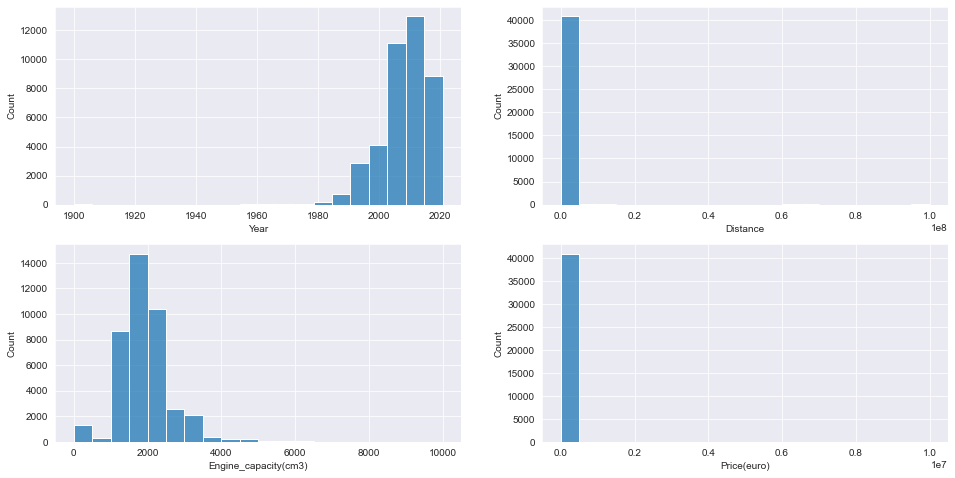

In [49]:
width = 2
height = int(np.ceil(len(num_columns)/width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(16,8))

for idx, column_name in enumerate(num_columns):

    plt.subplot(height,width, idx+1)
    sns.histplot(data=df,
            x=column_name, bins = 20);

Столбцы имеют явные аномалии, особенно Distance и Price(euro). Чтобы лучше понять эти аномалии посмотрим на столбцы в логарифмическом масштабе.

<AxesSubplot:xlabel='Price(euro)', ylabel='Count'>

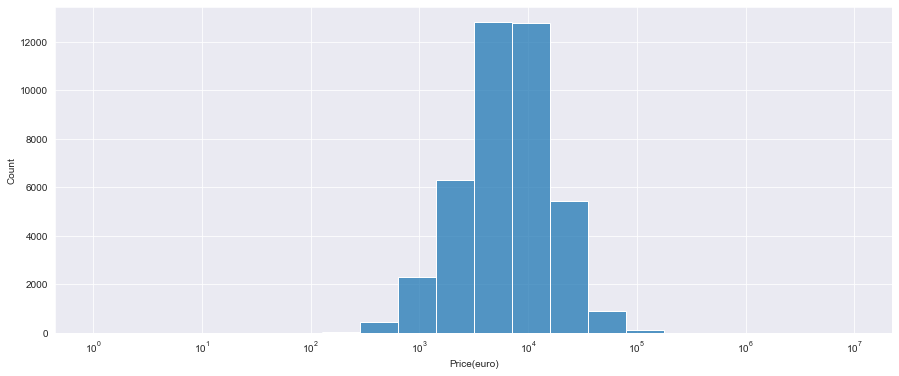

In [50]:
plt.figure(figsize=(15,6))
sns.histplot(data=df,x='Price(euro)', bins = 20, log_scale = True)

Удалим те объекты у которых Расстояние равно 0

<AxesSubplot:xlabel='Distance', ylabel='Count'>

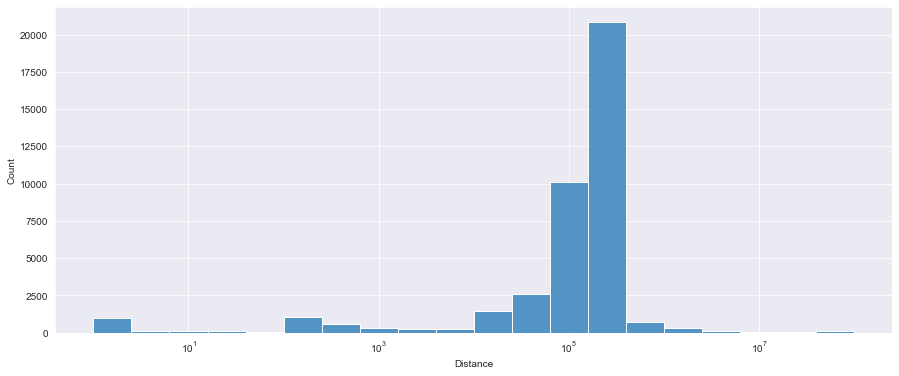

In [51]:
question_dist = df[df.Distance == 0]
df = df.drop(question_dist.index)

plt.figure(figsize=(15,6))
sns.histplot(data=df,
        x='Distance', bins = 20, log_scale = True)

Теперь мы можем определить, что нам требуется, чтобы почистить столбцы.

Также, так как задача хорошо интерпретируема мы можем почистить столбцы пользуясь здравым смыслом.

Например, мы можем удалить записи, где цена меньше 100 евро или пробег меньше 1000 км и год старый.

In [52]:
# здравый смысл
question_dist = df[(df.Year <2021) & (df.Distance < 1100)]
df = df.drop(question_dist.index)

# анализ гистограмм
question_dist = df[(df.Distance > 6e5)]
df = df.drop(question_dist.index)

# здравый смысл
question_engine = df[df["Engine_capacity(cm3)"] < 200]
df = df.drop(question_engine.index)

# здравый смысл
question_engine = df[df["Engine_capacity(cm3)"] > 5000]
df = df.drop(question_engine.index)

# здравый смысл
question_price = df[(df["Price(euro)"] < 101)]
df = df.drop(question_price.index)

# анализ гистограмм
question_price = df[df["Price(euro)"] > 5e4]
df = df.drop(question_price.index)

#анализ гистограмм
question_year = df[df.Year < 1981]
df = df.drop(question_year.index)

df = df.reset_index(drop=True)
df.tail()

Make         Model  Year      Style  Distance  \
35419  Land Rover    Freelander  2002  Crossover  225000.0   
35420       Dacia     Logan Mcv  2015  Universal   89000.0   
35421    Mercedes       E Class  2016      Sedan   50000.0   
35422       Mazda             6  2006      Combi  370000.0   
35423     Renault  Grand Scenic  2006    Minivan  300000.0   

       Engine_capacity(cm3)     Fuel_type Transmission  Price(euro)  
35419                1800.0  Metan/Propan       Manual       4400.0  
35420                1500.0        Diesel       Manual       7000.0  
35421                1950.0        Diesel    Automatic      29500.0  
35422                2000.0        Diesel       Manual       4000.0  
35423                1500.0        Diesel       Manual       4000.0

проверим сколько значений осталось в таблице

In [53]:
df.info

<bound method DataFrame.info of              Make         Model  Year      Style  Distance  \
0          Toyota         Prius  2011  Hatchback  195000.0   
1         Renault  Grand Scenic  2014  Universal  135000.0   
2         Renault        Laguna  2012  Universal  110000.0   
3            Opel         Astra  2006  Universal  200000.0   
4        Mercedes          Vito  2000   Microvan  300000.0   
...           ...           ...   ...        ...       ...   
35419  Land Rover    Freelander  2002  Crossover  225000.0   
35420       Dacia     Logan Mcv  2015  Universal   89000.0   
35421    Mercedes       E Class  2016      Sedan   50000.0   
35422       Mazda             6  2006      Combi  370000.0   
35423     Renault  Grand Scenic  2006    Minivan  300000.0   

       Engine_capacity(cm3)     Fuel_type Transmission  Price(euro)  
0                    1800.0        Hybrid    Automatic       7750.0  
1                    1500.0        Diesel       Manual       8550.0  
2            

посмотрим на результат

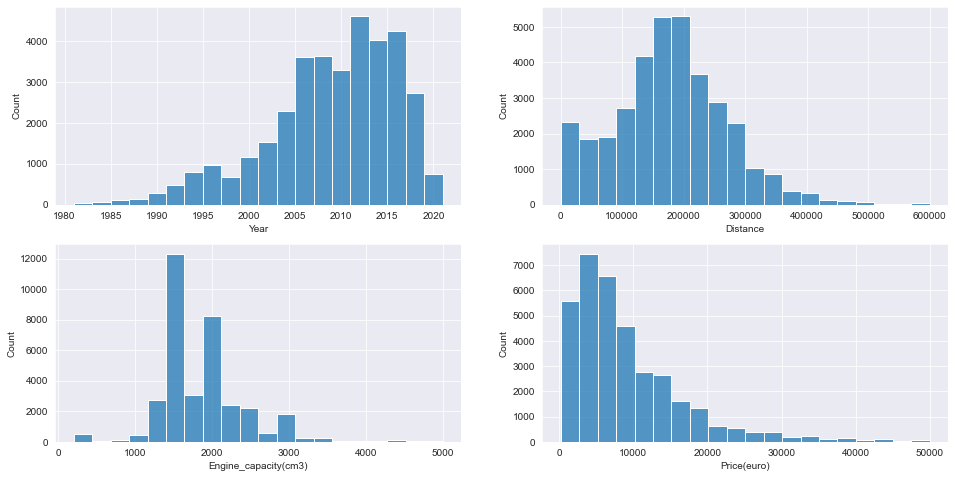

In [54]:
width = 2
height = int(np.ceil(len(num_columns)/width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(16,8))

for idx, column_name in enumerate(num_columns):

    plt.subplot(height,width, idx+1)
    sns.histplot(data=df,
            x=column_name, bins = 20)

Посмотрим зависимости друг от друга

<Figure size 1080x1080 with 0 Axes>

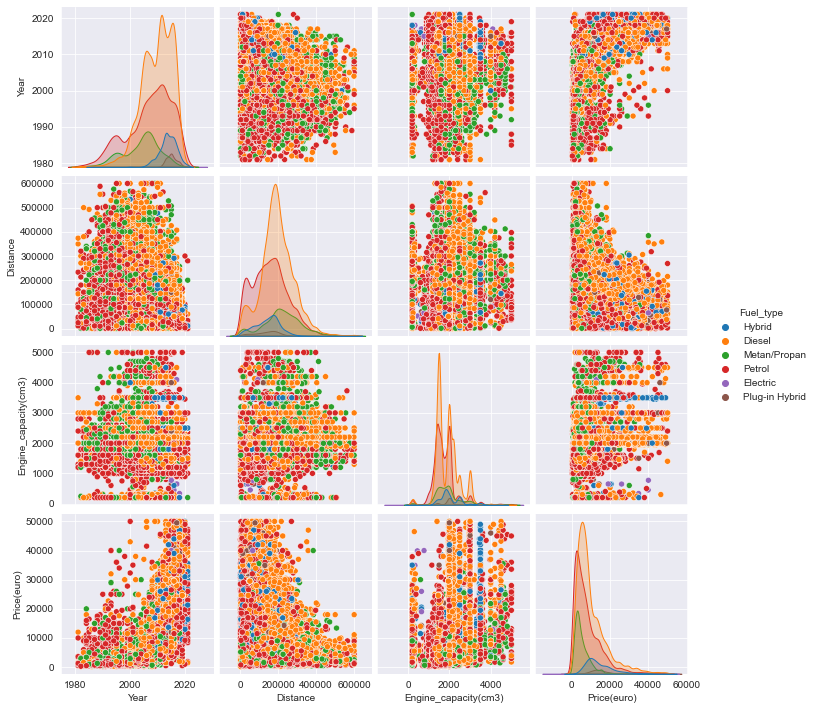

In [55]:
fig = plt.figure(figsize=(15,15))
sns.pairplot(data = df,
             hue ='Fuel_type',
             palette = 'tab10',);

# 3. Предварительная обработка

нормализация

In [56]:
DF_norm  = df.copy()
Xmin = df[num_columns].min()
Xmax = df[num_columns].max()

DF_norm[num_columns] = (df[num_columns]- Xmin)/( Xmax - Xmin)

<AxesSubplot:xlabel='Price(euro)', ylabel='Count'>

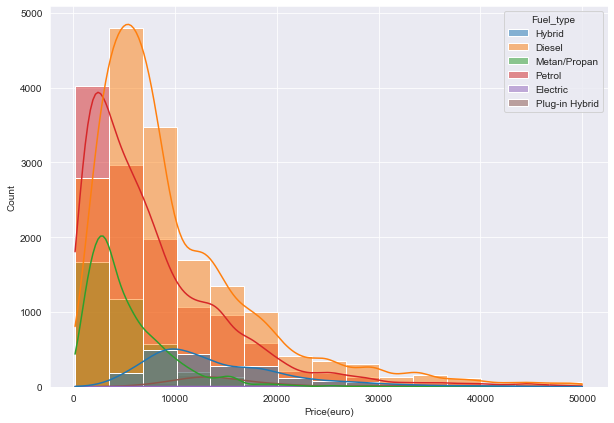

In [57]:
fig = plt.figure(figsize=(10,7))
sns.histplot(data = df,
             x = 'Price(euro)',
             hue = 'Fuel_type',
             bins = 15, kde = True,
             palette='tab10')

<AxesSubplot:xlabel='Price(euro)', ylabel='Count'>

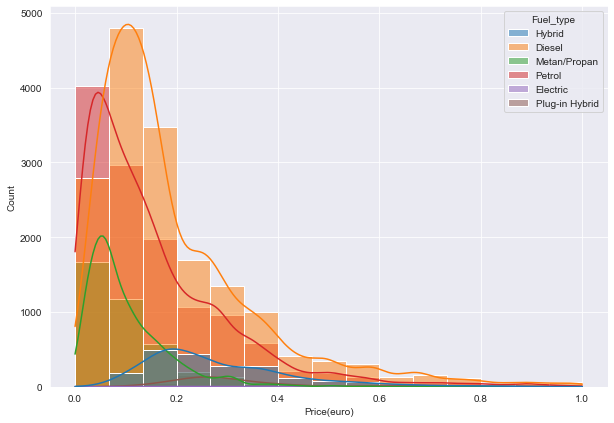

In [58]:
fig = plt.figure(figsize=(10,7))
sns.histplot(data = DF_norm,
             x = 'Price(euro)',
             hue = 'Fuel_type',
             bins = 15, kde = True,
             palette='tab10')

Стандартизация

In [59]:
DF_scaled = df.copy()
M = df[num_columns].mean()
STD = df[num_columns].std()
DF_scaled[num_columns] = (df[num_columns]-M)/STD

<AxesSubplot:xlabel='Price(euro)', ylabel='Count'>

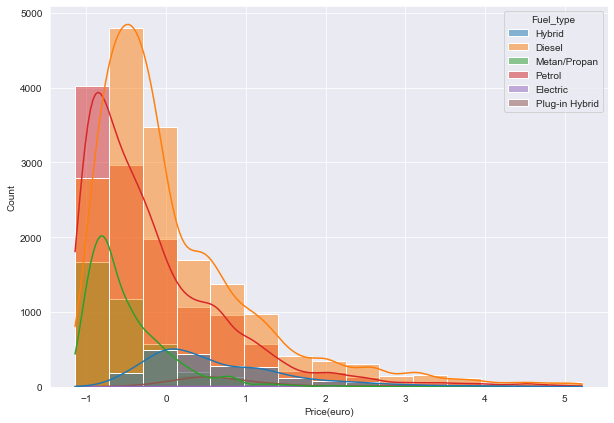

In [60]:
fig = plt.figure(figsize=(10,7))
sns.histplot(data = DF_scaled,
             x = 'Price(euro)',
             hue = 'Fuel_type',
             bins = 15, kde = True,
             palette='tab10')

Нелинейное преобразование<br>
Сначала логарифмирование, потом стандартизация

<AxesSubplot:xlabel='Price(euro)', ylabel='Count'>

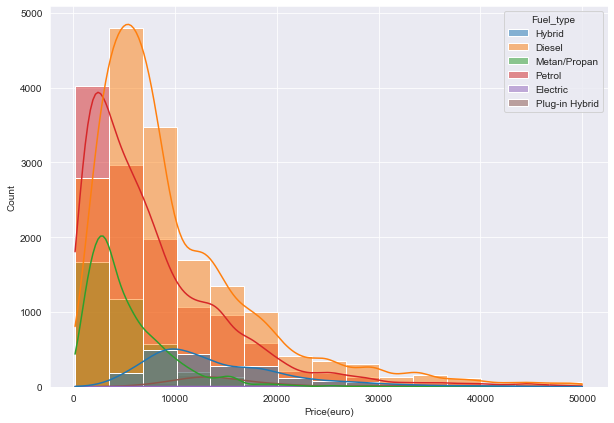

In [61]:
fig = plt.figure(figsize=(10,7))

sns.histplot(data = df,
             x = 'Price(euro)',
             hue = 'Fuel_type',
             bins = 15, kde = True,
             palette='tab10')

In [62]:
DF_power  = df.copy()
DF_power[num_columns] = np.log(DF_power[num_columns])
M = DF_power[num_columns].mean()
STD = DF_power[num_columns].std()
DF_power[num_columns] = (DF_power[num_columns]-M)/STD

<AxesSubplot:xlabel='Price(euro)', ylabel='Count'>

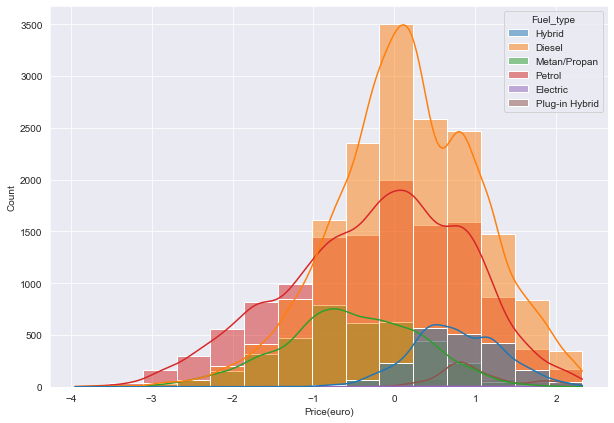

In [63]:
fig = plt.figure(figsize=(10,7))

sns.histplot(data = DF_power,
             x = 'Price(euro)',
             hue = 'Fuel_type',
             bins = 15, kde = True,
             palette='tab10')

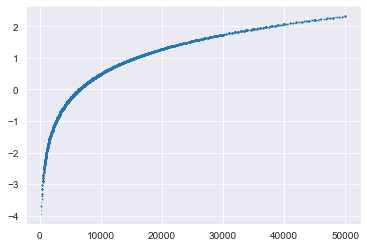

In [64]:
plt.plot(df['Price(euro)'], DF_power['Price(euro)'], '.', alpha = 0.5, markersize = 1)

# 4.Добавление колонки<br>
Зная суть или модель данных, мы можем предположить, чего нам не хватает - то есть попробовать добавить новый признак в данные. Такую операцию можно провести по-разному. В данном случае мы сделаем это исходя из логики. Введем признак пробег в год.

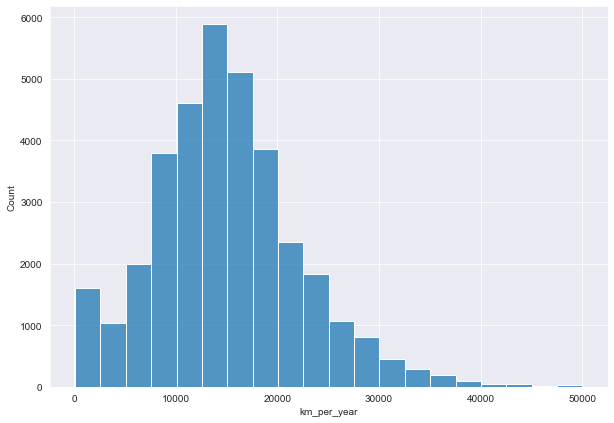

In [65]:
df['Age'] = 2022 - df.Year

df['km_per_year'] = df.Distance/df.Age
question_km_per_year = df[df.km_per_year > 5e4]
df = df.drop(question_km_per_year.index)
question_km_per_year = df[df.km_per_year < 100]
df = df.drop(question_km_per_year.index)
df = df.reset_index(drop=True)


plt.figure(figsize=(10,7))
sns.histplot(data=df,
            x='km_per_year', bins = 20);

<AxesSubplot:xlabel='km_per_year', ylabel='Distance'>

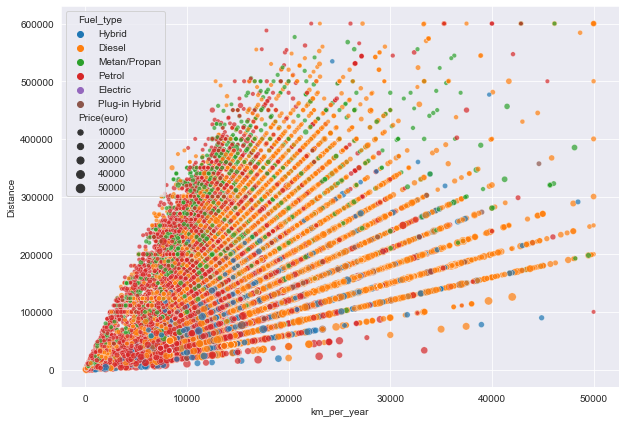

In [66]:
plt.figure(figsize=(10,7))
sns.scatterplot(
    data=df,
    x="km_per_year", y="Distance",
    hue="Fuel_type",
    size = "Price(euro)", alpha = 0.7,
             palette='tab10'
    )

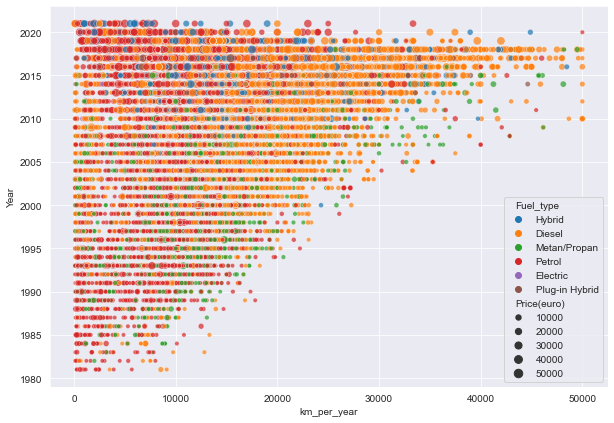

In [67]:
plt.figure(figsize=(10,7))
sns.scatterplot(
    data=df,
    x="km_per_year", y="Year",
    hue="Fuel_type",
    size = "Price(euro)", alpha = 0.7,
             palette='tab10'
    );

In [68]:
km_per_year = lambda x: 'small' if x < 10000 else 'medium' if x < 30000 else 'large'

df['km_per_year_cat'] = df['km_per_year'].apply(km_per_year)

In [69]:
df['km_per_year_cat'].value_counts()

medium    25855
small      8031
large      1231
Name: km_per_year_cat, dtype: int64

# 5.Удаление аномалий и связанных признаков.

In [70]:
num_columns.append('km_per_year')
num_columns

['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'km_per_year']

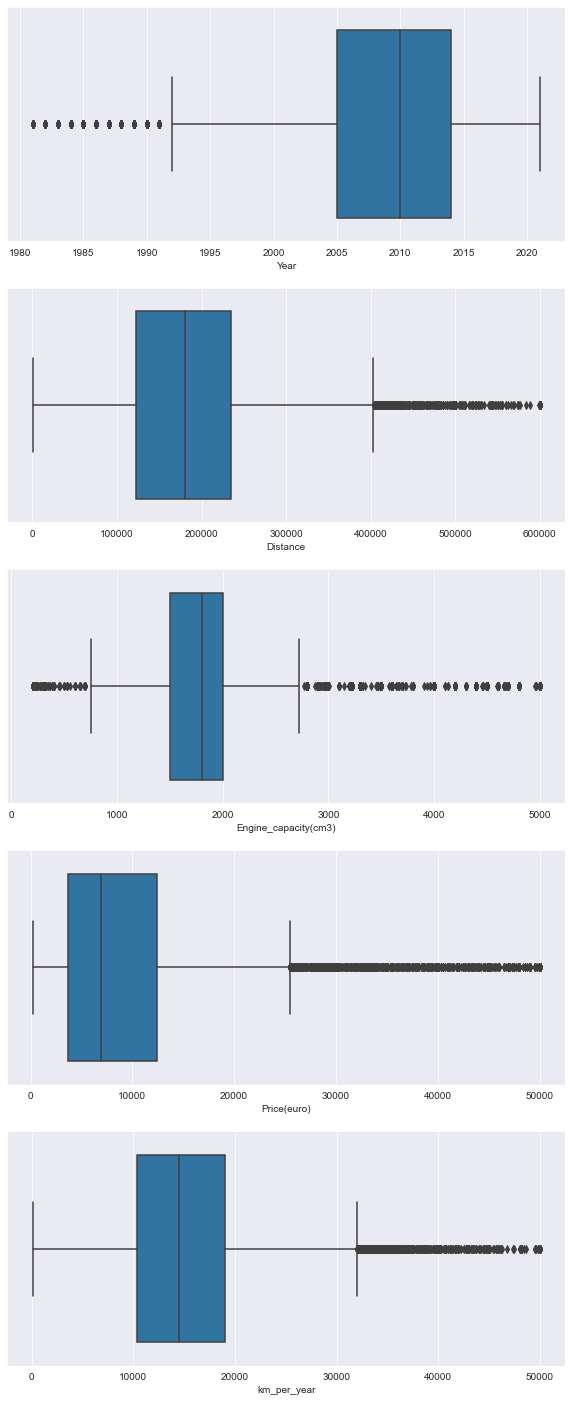

In [71]:
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(10,25))

for idx, column_name in enumerate(num_columns):

    plt.subplot(5,1, idx+1)
    sns.boxplot(data=df,
            x=column_name);

Посмотрим на корреляцию численных столбцов

In [72]:
cm = sns.color_palette("vlag", as_cmap=True)

df.corr().style.background_gradient(cmap=cm, vmin = -1, vmax=1)

# 6.Категориальные данные

In [73]:
cat_columns.append('km_per_year_cat')
cat_columns

['Make', 'Model', 'Style', 'Fuel_type', 'Transmission', 'km_per_year_cat']

In [74]:
df[cat_columns].nunique()

Make                78
Model              771
Style               12
Fuel_type            6
Transmission         2
km_per_year_cat      3
dtype: int64

Исключим редкие записи без потери точности, запишем их в один тип - rare

In [75]:
counts = df.Make.value_counts()

counts

Volkswagen    3710
Toyota        3399
Mercedes      3216
BMW           2733
Renault       2616
              ... 
Zotye            1
Changan          1
Tata             1
Saturn           1
Pontiac          1
Name: Make, Length: 78, dtype: int64

In [76]:
counts.median()

33.5

In [77]:
counts[counts<100]

Rover               95
Chrysler            93
Jeep                83
Infiniti            78
Mini                76
Jaguar              73
Daewoo              66
Lincoln             54
Dodge               51
Alfa Romeo          38
Ssangyong           34
Smart               33
GAZ                 30
Daihatsu            28
Moskvich / Izh      22
Chery               19
Acura               18
UAZ                 18
Great Wall          17
Lancia              17
Cadillac            17
Saab                17
Brilliance          16
Byd                 15
Alta marca          13
Lifan               10
Lada                10
Zaz                  9
Isuzu                6
LuAZ                 5
Buick                5
GMC                  5
Ravon                5
Haima                4
Tesla                4
Geely                3
Scion                3
Maserati             3
Datsun               3
Hummer               3
Faw                  2
Mercedes-Maybach     2
ARO                  2
Groz       

In [78]:
rare =  counts[counts < 25]
rare_cheap = df[df.Make.isin(rare.index) & (df["Price(euro)"] <= 25000)].Make.value_counts()
rare_expensive = df[df.Make.isin(rare.index) & (df["Price(euro)"] > 25000)].Make.value_counts()


In [80]:
rare_dict = {}
for i in rare.index:
    if i in rare_cheap.index:
        rare_dict[i] = 'Rare_cheap'

    elif i in rare_expensive.index:
        rare_dict[i] = 'Rare_expensive'
    else:
        rare_dict[i] = 'Rare'

df.Make = df.Make.replace(rare_dict)

df.Make.value_counts()

Volkswagen        3710
Toyota            3399
Mercedes          3216
BMW               2733
Renault           2616
Opel              1952
Skoda             1900
Audi              1613
Ford              1489
Dacia             1457
Nissan            1448
Hyundai           1429
Honda              962
KIA                732
Mitsubishi         668
Lexus              645
Volvo              621
Mazda              476
Vaz                462
Chevrolet          431
Peugeot            414
Citroen            324
Rare_cheap         273
Land Rover         267
Seat               258
Suzuki             257
Fiat               194
Porsche            178
Subaru             154
Rover               95
Chrysler            93
Jeep                83
Infiniti            78
Mini                76
Jaguar              73
Daewoo              66
Lincoln             54
Dodge               51
Alfa Romeo          38
Ssangyong           34
Smart               33
GAZ                 30
Daihatsu            28
Rare_expens

# 7. Сохранение DataFrame в файл

In [81]:
df.to_csv("cars_moldova_clear.csv", index = False)


# 8. Приведение  категориальных признаков к числовым

Бинарные признаки

In [82]:
df['Transmission'] = df['Transmission'].map({'Automatic': 1, 'Manual': 0})

Кодирование многозначных признаков

In [83]:
df_se = df.copy()
df_se[cat_columns] = df_se[cat_columns].astype('category')

for _, column_name in enumerate(cat_columns):
    df_se[column_name] =  df_se[column_name].cat.codes
df_se.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35117 entries, 0 to 35116
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  35117 non-null  int8   
 1   Model                 35117 non-null  int16  
 2   Year                  35117 non-null  int64  
 3   Style                 35117 non-null  int8   
 4   Distance              35117 non-null  float64
 5   Engine_capacity(cm3)  35117 non-null  float64
 6   Fuel_type             35117 non-null  int8   
 7   Transmission          35117 non-null  int8   
 8   Price(euro)           35117 non-null  float64
 9   Age                   35117 non-null  int64  
 10  km_per_year           35117 non-null  float64
 11  km_per_year_cat       35117 non-null  int8   
dtypes: float64(4), int16(1), int64(2), int8(5)
memory usage: 1.8 MB


In [84]:
df_se.head()

Make  Model  Year  Style  Distance  Engine_capacity(cm3)  Fuel_type  \
0    40    534  2011      4  195000.0                1800.0          2   
1    32    359  2014     11  135000.0                1500.0          0   
2    32    419  2012     11  110000.0                1500.0          0   
3    27    136  2006     11  200000.0                1600.0          3   
4    23    720  2000      5  300000.0                2200.0          0   

   Transmission  Price(euro)  Age   km_per_year  km_per_year_cat  
0             1       7750.0   11  17727.272727                1  
1             0       8550.0    8  16875.000000                1  
2             0       6550.0   10  11000.000000                1  
3             0       4100.0   16  12500.000000                1  
4             0       3490.0   22  13636.363636                1

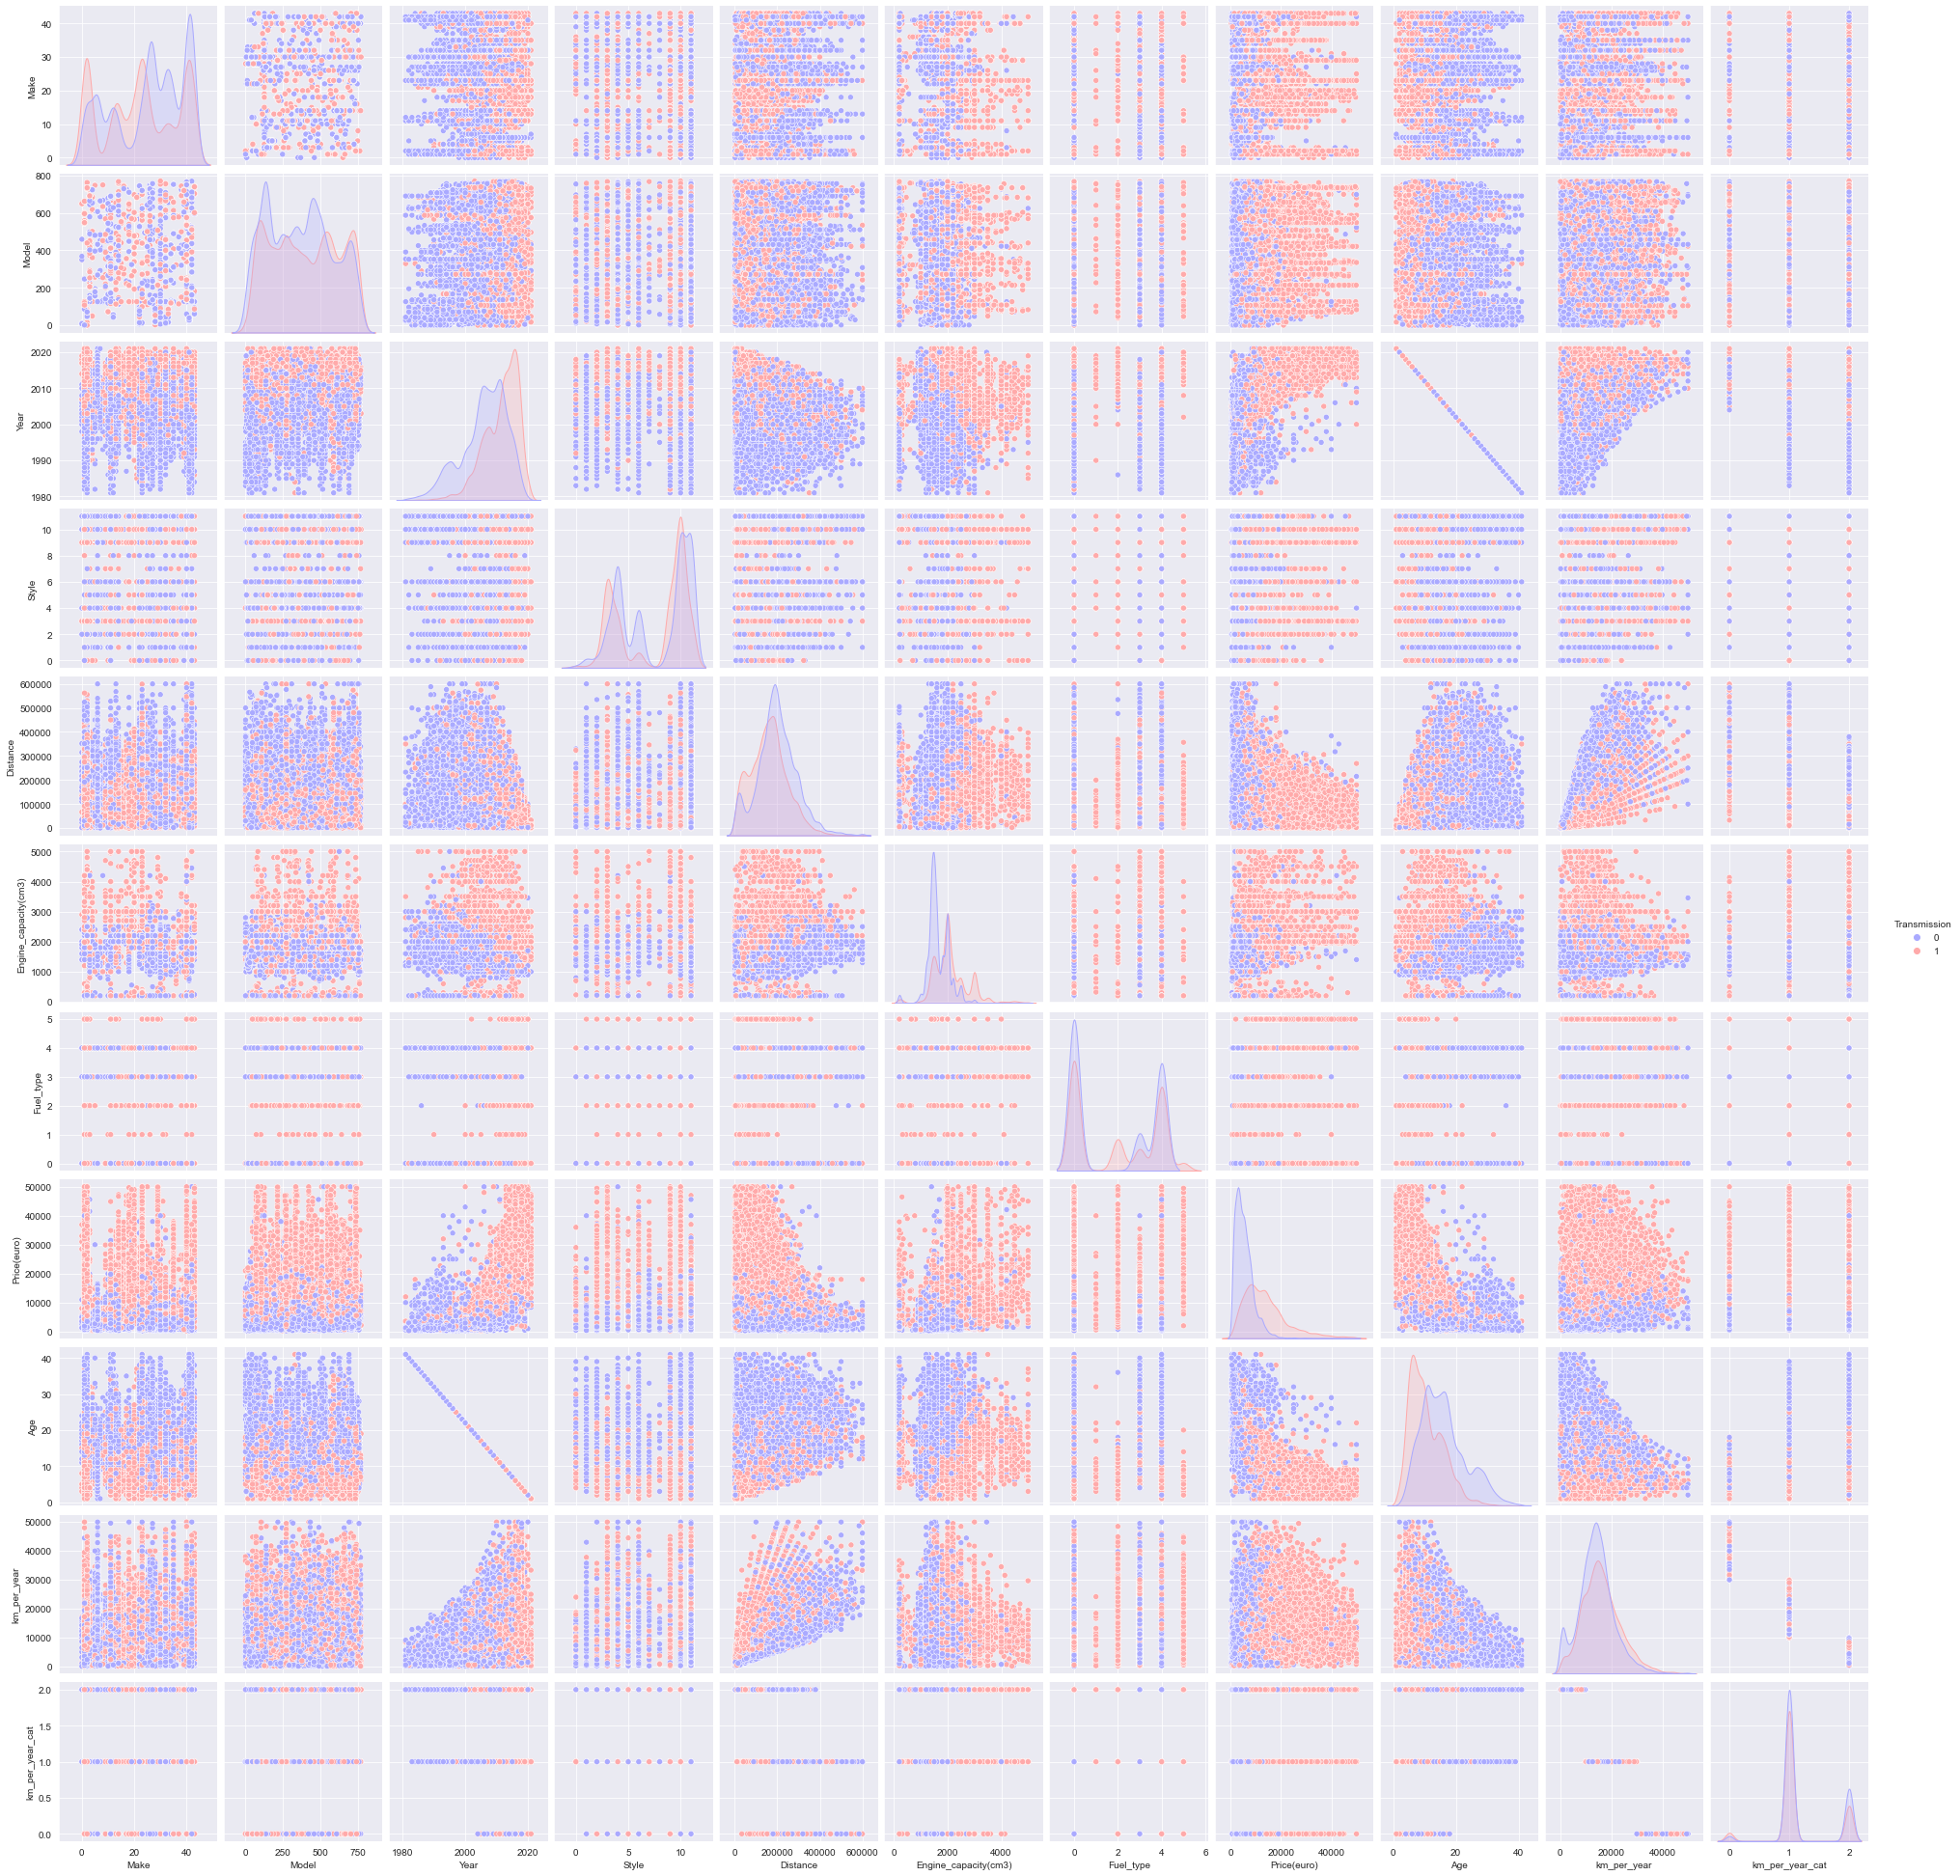

In [85]:
sns.pairplot(data = df_se, hue ='Transmission', palette='bwr');

One-hot кодирование многозначных признаков

In [86]:
df_ohe = df.copy()
df_ohe = pd.get_dummies(df_ohe)
df_ohe.tail()

Year  Distance  Engine_capacity(cm3)  Transmission  Price(euro)  Age  \
35112  2002  225000.0                1800.0             0       4400.0   20   
35113  2015   89000.0                1500.0             0       7000.0    7   
35114  2016   50000.0                1950.0             1      29500.0    6   
35115  2006  370000.0                2000.0             0       4000.0   16   
35116  2006  300000.0                1500.0             0       4000.0   16   

        km_per_year  Make_Alfa Romeo  Make_Audi  Make_BMW  ...  \
35112  11250.000000                0          0         0  ...   
35113  12714.285714                0          0         0  ...   
35114   8333.333333                0          0         0  ...   
35115  23125.000000                0          0         0  ...   
35116  18750.000000                0          0         0  ...   

       Style_Universal  Fuel_type_Diesel  Fuel_type_Electric  \
35112                0                 0                   0   
35113                1                 1                   0   
35114                0                 1                   0   
35115                0                 1                   0   
35116                0                 1                   0   

       Fuel_type_Hybrid  Fuel_type_Metan/Propan  Fuel_type_Petrol  \
35112                 0                       1                 0   
35113                 0                       0                 0   
35114                 0                       0                 0   
35115                 0                       0                 0   
35116                 0                       0                 0   

       Fuel_type_Plug-in Hybrid  km_per_year_cat_large  \
35112                         0                      0   
35113                         0                      0   
35114                         0                      0   
35115                         0                      0   
35116                         0                      0   

       km_per_year_cat_medium  km_per_year_cat_small  
35112                       1                      0  
35113                       1                      0  
35114                       0                      1  
35115                       1                      0  
35116                       1                      0  

[5 rows x 843 columns]

In [87]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35117 entries, 0 to 35116
Columns: 843 entries, Year to km_per_year_cat_small
dtypes: float64(4), int64(3), uint8(836)
memory usage: 29.9 MB


Сохранение DataFrame в файл

In [88]:
df_se.to_csv('cars_moldova_cat_num.csv',index=False)
df_ohe.to_csv('cars_moldova_onehot.csv',index=False)